# Preparando o ambiente

In [ ]:
!pip install gdown

In [ ]:
!mkdir -p data/
!gdown https://drive.google.com/uc?id=1zcsUU6neakc2_BnATvvsLekvMyz1cztM -O data/
!gdown https://drive.google.com/uc?id=1zZdavmX2Zlhfe9up-25rXvE3v0HF9Ajd -O data/

Downloading...
From: https://drive.google.com/uc?id=1zcsUU6neakc2_BnATvvsLekvMyz1cztM
To: /content/data/Advertising.csv
100% 4.55k/4.55k [00:00<00:00, 11.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zZdavmX2Zlhfe9up-25rXvE3v0HF9Ajd
To: /content/data/Portland_housePrices.csv
100% 679/679 [00:00<00:00, 2.08MB/s]


In [ ]:
!ls data/

Advertising.csv  Portland_housePrices.csv


## Regressão

O objetivo deste exercício é introduzir e praticar conceitos de Regressão. Para isso utilizaremos 2 bases: <i>Advertising.csv</i> e <i>Portland_housePrices.csv</i>

In [ ]:
import pandas as pd

dados_adv = pd.read_csv('data/Advertising.csv', index_col=0)
dados_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<i>Advertising</i> é um conjunto de dados relacionando o montante de vendas (<i>sales</i>) com o montante investido em marketing em diferentes médias (<i>TV</i>,<i>radio</i> e <i>newspaper</i>).

Por sua vez, <i>Portland_housePrices</i> relaciona o preço de casas com seu tamanho e número de quartos.



In [ ]:
dados_por = pd.read_csv('data/Portland_housePrices.csv', index_col=None)
dados_por.head()

,tamanho,quartos,preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Como treinar e usar modelos?
Para virtualmente qualquer tipo de algoritmo de Regressão, existirá uma função <i>fit</i> para treinar o modelo.

Por exemplo, para a regressão linear:

```python
 reg = LinearRegression().fit(X,y)
```

Onde <i> X </i> se refere aos atributos de treinamento e <i>y</i> à variável resposta.


In [ ]:
from sklearn.linear_model import LinearRegression
#Treina modelo utilizando dados de tamanho para prever preco
X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

reg = LinearRegression().fit(X,y)
reg

LinearRegression()

Após treinado, o modelo pode ser utilizado para fazer predições (prever <i>y</i> para novos exemplos), através da função <i>predict</i>

In [ ]:
y_hat = reg.predict(X[0:4])
y_hat

array([[354311.69781212],
       [286510.95280112],
       [394131.18297731],
       [261758.29986059]])

## Regressão Linear Univariada

O framework disponibiliza uma classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">LinearRegression</a> que implementa regressão linear com o método de mínimos quadrados:

```python
linear_model = LinearRegression()
linear_model.fit(X,y)
linear_model.predict(X)

```
## Avaliando Modelos

Existem algumas formas de inspecionar ou avaliar o modelo aprendido. A primeira forma é visualizar o modelo em um gráfico.



Text(0, 0.5, 'Preço')

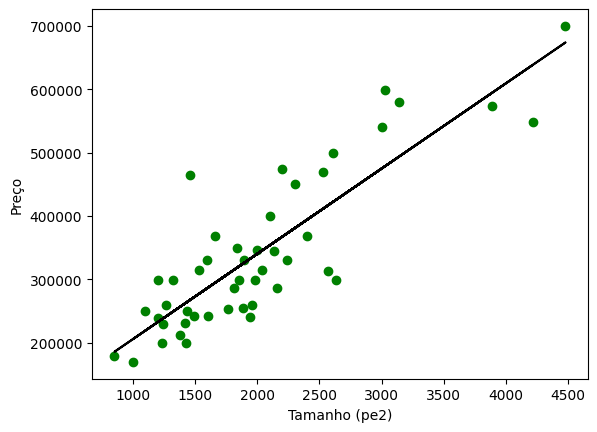

In [ ]:
from matplotlib import pyplot as plt

plt.scatter(X, y,color='g')
plt.plot(X, reg.predict(X),color='k')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

Quando há mais de um atributo preditor, visualizar o modelo torna-se difícil, mas ainda é possível avaliar o modelo através do <b>erro quadrático (RSS)</b> ou a métrica <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html"><b>R^2</b></a>

In [ ]:
from sklearn.metrics import r2_score
def calc_rss(y,predicted):
    return float(((predicted - y) ** 2).sum())

def calc_r2(y,predicted):
    return r2_score(predicted,y)

In [ ]:
rss = calc_rss(y,reg.predict(X))
r2 = calc_r2(y,reg.predict(X))
print(rss)
print(r2)

193464477600.7059
0.6320180251851147


<ipython-input-9-3bdc3172cf7d>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(((predicted - y) ** 2).sum())


# Exercício 1
Treine modelos lineares na base <i>Portland_housePrices.csv</i> utilizando apenas um dos atributos preditores.

1) Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com <i>tamanho</i> ou com <i>número de quartos</i>?

2) O RSS e R^2 corroboram suas impressões observando o modelo?




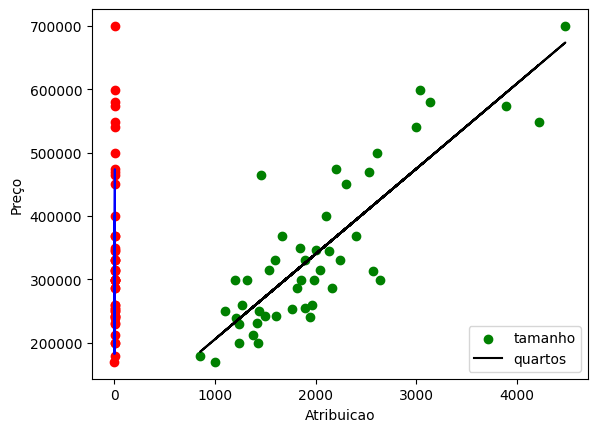

In [49]:
#Regressao Linear Portland
from sklearn.linear_model import LinearRegression
#Treina modelo utilizando dados de tamanho para prever preco
X_tamanho = dados_por.loc[:,['tamanho']]
y_tamanho = dados_por.loc[:,['preco']]

reg_tamanho = LinearRegression().fit(X_tamanho,y_tamanho)

#treina modelo utilizando dados de quartos para prever preco
x_quartos = dados_por.loc[:,['quartos']]
y_quartos = dados_por.loc[:,['preco']]

reg_quartos = LinearRegression().fit(x_quartos,y_quartos)

plt.scatter(X_tamanho, y_tamanho,color='g')
plt.plot(X_tamanho, reg_tamanho.predict(X_tamanho),color='k')
plt.scatter(x_quartos, y_quartos,color='r')
plt.plot(x_quartos, reg_quartos.predict(x_quartos),color='b')
plt.xlabel('Atribuicao')
plt.ylabel('Preço')
plt.legend(['tamanho','quartos'])
plt.show()


O atributo tamanho é o mais razoavel


In [51]:
rss_tamanho = calc_rss(y_tamanho,reg_tamanho.predict(X_tamanho))
r2_tamanho = calc_r2(y_tamanho,reg_tamanho.predict(X_tamanho))

rss_quartos = calc_rss(y_quartos,reg_quartos.predict(x_quartos))
r2_quartos = calc_r2(y_quartos,reg_quartos.predict(x_quartos))

print('RSS Tamanho: ',rss_tamanho)
print('Rˆ2 Tamanho: ',r2_tamanho)
print('RSS Quarto: ',rss_quartos)
print('Rˆ2 Quarto: ',r2_quartos)

RSS Tamanho:  193464477600.7059
Rˆ2 Tamanho:  0.6320180251851147
RSS Quarto:  578535325112.5249
Rˆ2 Quarto:  -3.112607855431998


<ipython-input-10-ae5ab3570a15>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(((predicted - y) ** 2).sum())
<ipython-input-10-ae5ab3570a15>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(((predicted - y) ** 2).sum())


Sim o RSS e Rˆ2 corroboram as impressoes, o tamanho ainda é mais preciso

# Exercício 2

Treine modelos lineares na base <i>Advertising.csv</i> utilizando apenas um dos atributos preditores.

1) Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com TV, radio ou newspaper?

2) Qual dos modelos é melhor? como você chegou a esta conclusão?

In [52]:
#Treinando o modelo utilizando a tv em relacao a vendas
X_tv = dados_adv.loc[:,['TV']]
y_tv = dados_adv.loc[:,['sales']]

reg_tv = LinearRegression().fit(X_tv,y_tv)

#Treinando o modelo utilizando a radio em relacao a vendas
X_radio = dados_adv.loc[:,['radio']]
y_radio = dados_adv.loc[:,['sales']]

reg_radio = LinearRegression().fit(X_radio,y_radio)

#Treinando o modelo utilizando a newspaper em relacao a vendas
X_newspaper = dados_adv.loc[:,['newspaper']]
y_newspaper = dados_adv.loc[:,['sales']]

reg_newspaper = LinearRegression().fit(X_newspaper,y_newspaper)

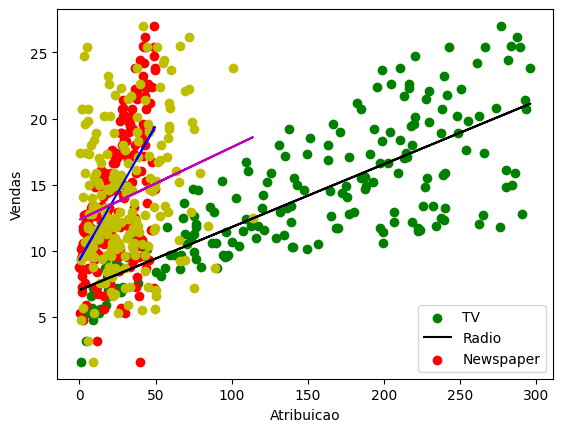

In [53]:
plt.scatter(X_tv, y_tv,color='g')
plt.plot(X_tv, reg_tv.predict(X_tv),color='k')
plt.scatter(X_radio, y_radio,color='r')
plt.plot(X_radio, reg_radio.predict(X_radio),color='b')
plt.scatter(X_newspaper, y_newspaper,color='y')
plt.plot(X_newspaper, reg_newspaper.predict(X_newspaper),color='m')
plt.xlabel('Atribuicao')
plt.ylabel('Vendas')
plt.legend(['TV','Radio','Newspaper'])
plt.show()

Baseado no grafico podemos ver que a tv é o atributo mais razoavel

# Exercício 3

1. Compare os resultados das duas regressões com a implemtação do KNN-Regressor visto na aula passada.

1. Utilizando a API do scikit-learn para criação de partições de treino e teste, refaça a sua regressão nas partições de treino e faça a validação nas partições de teste.

    1. Comparar os resultados na partição de treino e teste;
    1. Comparar desempenho com a regressão na qual não foi feita a separação entre treino e teste. Você acha que o desempenho deveria ser melhor ou pior nesse caso? É possível dizer que os modelos treinados no dataset completo generalizam?


In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

#Separando Treino para o portland usando a variavel tamanho
X_train, X_test, y_train, y_test = train_test_split(X_tamanho, y, test_size=0.2, random_state=42)

reg_train = LinearRegression().fit(X_train,y_train)
reg_test = LinearRegression().fit(X_test,y_test)
knn_train = KNeighborsRegressor(n_neighbors=10).fit(X_train,y_train)
knn_test = KNeighborsRegressor(n_neighbors=10).fit(X_test,y_test)
y_pred_reg_train = reg_train.predict(X_train)
y_pred_reg_test = reg_test.predict(X_test)
y_pred_knn = knn_test.predict(X_test)
y_pred_knn_train = knn_train.predict(X_train)

#Separando Treino para Advertising usando a variavel tv
X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(X_tv, y_tv, test_size=0.2, random_state=42)

reg_train_adv = LinearRegression().fit(X_train_adv,y_train_adv)
reg_test_adv = LinearRegression().fit(X_test_adv,y_test_adv)
knn_train_adv = KNeighborsRegressor(n_neighbors=10).fit(X_train_adv,y_train_adv)
knn_test_adv = KNeighborsRegressor(n_neighbors=10).fit(X_test_adv,y_test_adv)
y_pred_reg_train_adv = reg_train_adv.predict(X_train_adv)
y_pred_reg_test_adv = reg_test_adv.predict(X_test_adv)
y_pred_knn_adv = knn_test_adv.predict(X_test_adv)
y_pred_knn_train_adv = knn_train_adv.predict(X_train_adv)

#Comparacao de resultados entre regressao linear e o knn
print("RSS Regressão Linear Treino Portland_housePrices:", calc_rss(y_train, y_pred_reg_train))
print("R^2 Regressão Linear Treino Portland_housePrices:", calc_r2(y_train, y_pred_reg_train))
print("RSS Regressão Linear Teste Portland_housePrices:", calc_rss(y_test, y_pred_reg_test))
print("R^2 Regressão Linear Teste Portland_housePrices:", calc_r2(y_test, y_pred_reg_test))

print("RSS KNN-Regressor Treino Portland_housePrices:", calc_rss(y_train, y_pred_knn_train))
print("R^2 KNN-Regressor Treino Portland_housePrices:", calc_r2(y_train, y_pred_knn_train))
print("RSS KNN-Regressor Teste Portland_housePrices:", calc_rss(y_test, y_pred_knn))
print("R^2 KNN-Regressor Teste Portland_housePrices:", calc_r2(y_test, y_pred_knn))

# Comparação de resultados para Advertising
print("RSS Regressão Linear Treino Advertising:", calc_rss(y_train_adv, y_pred_reg_train_adv))
print("R^2 Regressão Linear Treino Advertising:", calc_r2(y_train_adv, y_pred_reg_train_adv))
print("RSS Regressão Linear Teste Advertising:", calc_rss(y_test_adv, y_pred_reg_test_adv))
print("R^2 Regressão Linear Teste Advertising:", calc_r2(y_test_adv, y_pred_reg_test_adv))


print("RSS KNN-Regressor Treino Advertising:", calc_rss(y_train_adv, y_pred_knn_train_adv))
print("R^2 KNN-Regressor Treino Advertising:", calc_r2(y_train_adv, y_pred_knn_train_adv))
print("RSS KNN-Regressor Teste Advertising:", calc_rss(y_test_adv, y_pred_knn_adv))
print("R^2 KNN-Regressor Teste Advertising:", calc_r2(y_test_adv, y_pred_knn_adv))


RSS Regressão Linear Treino Portland_housePrices: 115970368456.87866
R^2 Regressão Linear Treino Portland_housePrices: 0.6899561356768185
RSS Regressão Linear Teste Portland_housePrices: 52382926473.94876
R^2 Regressão Linear Teste Portland_housePrices: 0.5813032692292326
RSS KNN-Regressor Treino Portland_housePrices: 184142718907.38004
R^2 KNN-Regressor Treino Portland_housePrices: -0.22436086045899284
RSS KNN-Regressor Teste Portland_housePrices: 177492397420.90002
R^2 KNN-Regressor Teste Portland_housePrices: 0.0
RSS Regressão Linear Treino Advertising: 1696.576091358283
R^2 Regressão Linear Treino Advertising: 0.30842998660581655
RSS Regressão Linear Teste Advertising: 396.405898791155
R^2 Regressão Linear Teste Advertising: 0.5423293206296177
RSS KNN-Regressor Treino Advertising: 1594.4207999999999
R^2 KNN-Regressor Treino Advertising: 0.3585247510563154
RSS KNN-Regressor Teste Advertising: 404.62019999999984
R^2 KNN-Regressor Teste Advertising: 0.4742049455638263


<ipython-input-10-ae5ab3570a15>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(((predicted - y) ** 2).sum())
<ipython-input-10-ae5ab3570a15>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(((predicted - y) ** 2).sum())
<ipython-input-10-ae5ab3570a15>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(((predicted - y) ** 2).sum())
<ipython-input-10-ae5ab3570a15>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(((predicted - y) ** 2).sum())
<ipython-input-10-ae5ab3570a15>:3: FutureWarning: Calling float on a single element Series is deprecated and

Para determinar qual dos modelos é melhor, podemos comparar os resultados dos modelos de regressão linear e KNN-Regressor nas partições de treino e teste.

Portland_housePrices

Observando os resultados, podemos ver que o modelo de regressão linear apresenta um RSS e R^2 melhores tanto no treino quanto no teste. Isso sugere que o modelo de regressão linear é mais preciso e geraliza melhor para novos dados.

Advertising

Novamente, o modelo de regressão linear apresenta um RSS e R^2 melhores tanto no treino quanto no teste. Isso sugere que o modelo de regressão linear é mais preciso e geraliza melhor para novos dados.

Conclusão

Baseado nos resultados, podemos concluir que o modelo de regressão linear é melhor para ambos os conjuntos de dados. Isso porque ele apresenta um RSS e R^2 melhores tanto no treino quanto no teste, o que sugere que ele é mais preciso e geraliza melhor para novos dados.

Além disso, é importante notar que o modelo de regressão linear é mais interpretable e fácil de entender do que o modelo KNN-Regressor, o que pode ser uma vantagem em muitos casos.
